# ColorDescriptor

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import math
from IPython.core.pylabtools import figsize
figsize(16, 12)
from cyvlfeat.kmeans import kmeans
from scipy.spatial import distance

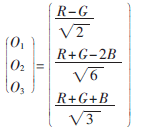

In [2]:
img = cv2.imread('../testTrainingDataMix/1802late86.jpg')
b,g,r = cv2.split(img)
O_1 = (r-g)/math.sqrt(2)
O_2 = (r+g-2*b)/math.sqrt(6)
O_3 = (r+g+b)/math.sqrt(3)
O_1 = cv2.normalize(O_1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
O_2 = cv2.normalize(O_2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
O_3 = cv2.normalize(O_3, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

In [3]:
# O_1 = r
# O_2 = g
# O_3 = b
# O_1 = cv2.normalize(O_1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
# O_2 = cv2.normalize(O_2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
# O_3 = cv2.normalize(O_3, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

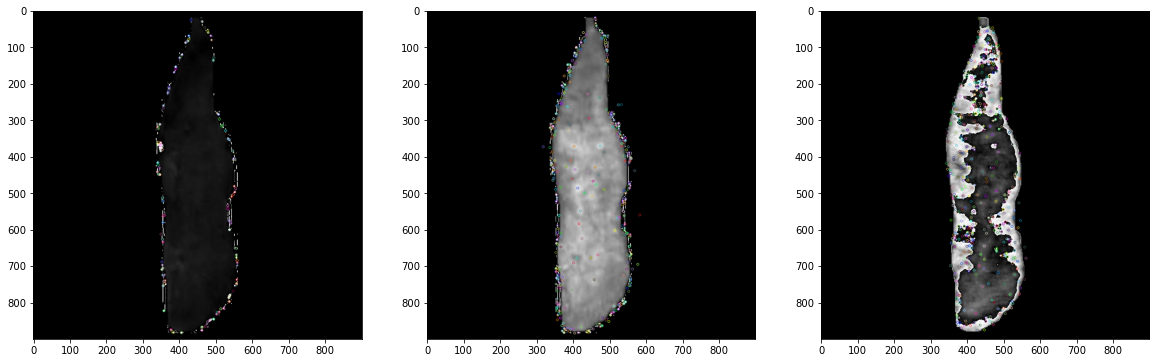

In [4]:
def sift_kp(image):
#     gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d_SIFT.create()
    kp,des = sift.detectAndCompute(image, None)
    kp_image = cv2.drawKeypoints(image, kp, None)
    return kp_image,kp,des
kp_image1,kp1, des1 = sift_kp(O_1)
kp_image2,kp2, des2 = sift_kp(O_2)
kp_image3,kp3, des3 = sift_kp(O_3)
plt.figure(figsize = (20,16))
plt.subplot(131)
plt.imshow(cv2.cvtColor(kp_image1,cv2.COLOR_BGR2RGB))
plt.subplot(132)
plt.imshow(cv2.cvtColor(kp_image2,cv2.COLOR_BGR2RGB))
plt.subplot(133)
plt.imshow(cv2.cvtColor(kp_image3,cv2.COLOR_BGR2RGB))

In [5]:
print(len(kp1))
print(len(kp2))
print(len(kp3))

187
488
662


In [6]:
des2.shape

(488, 128)

In [7]:
des1_pad = np.pad(des1,((0,0),(0,256)),'constant',constant_values = (0,0))
des2_pad = np.pad(des2,((0,0),(128,128)),'constant',constant_values = (0,0)) 
des3_pad = np.pad(des3,((0,0),(256,0)),'constant',constant_values = (0,0)) 
descriptors = np.vstack((des1_pad,des2_pad,des3_pad))
descriptors.shape

(1337, 384)

In [8]:
! rm ./testTrainingData

rm: ./testTrainingData: No such file or directory


In [9]:
def get_clusters(inputDir, cluster_size):
    bag_of_features = []
    for (path,dirname,filenames) in os.walk(inputDir):
        for imageName in filenames: 
            if imageName.endswith('.jpg'):
#                 print(imageName)
                img = cv2.imread(inputDir+imageName)
                b,g,r = cv2.split(img)
                O_1 = (r-g)/math.sqrt(2)
                O_2 = (r+g-2*b)/math.sqrt(6)
                O_3 = (r+g+b)/math.sqrt(3)
                O_1 = cv2.normalize(O_1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
                O_2 = cv2.normalize(O_2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
                O_3 = cv2.normalize(O_3, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

                sift = cv2.xfeatures2d.SIFT_create()
                k1,des1 = sift.detectAndCompute(O_1,None)
                k2,des2 = sift.detectAndCompute(O_2,None)
                k3,des3 = sift.detectAndCompute(O_3,None)
                des1_pad = np.pad(des1,((0,0),(0,256)),'constant',constant_values = (0,0))
                des2_pad = np.pad(des2,((0,0),(128,128)),'constant',constant_values = (0,0)) 
                des3_pad = np.pad(des3,((0,0),(256,0)),'constant',constant_values = (0,0)) 
                descriptors = np.vstack((des1_pad,des2_pad,des3_pad))

                if descriptors is not None:
                      for des in descriptors:
                            bag_of_features.append(des)
        clusters = kmeans(np.array(bag_of_features).astype('float32'),
                          cluster_size, initialization="PLUSPLUS")
    return clusters

In [10]:
feature_clusters = get_clusters('../testTrainingData_batch5/', 64)

In [11]:
def image_histogram(image, feature_clusters):
    img = cv2.imread(image)
    b,g,r = cv2.split(img)
    O_1 = (r-g)/math.sqrt(2)
    O_2 = (r+g-2*b)/math.sqrt(6)
    O_3 = (r+g+b)/math.sqrt(3)
    O_1 = cv2.normalize(O_1, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    O_2 = cv2.normalize(O_2, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    O_3 = cv2.normalize(O_3, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')

    sift = cv2.xfeatures2d.SIFT_create()
    k1,des1 = sift.detectAndCompute(O_1,None)
    k2,des2 = sift.detectAndCompute(O_2,None)
    k3,des3 = sift.detectAndCompute(O_3,None)
    des1_pad = np.pad(des1,((0,0),(0,256)),'constant',constant_values = (0,0))
    des2_pad = np.pad(des2,((0,0),(128,128)),'constant',constant_values = (0,0)) 
    des3_pad = np.pad(des3,((0,0),(256,0)),'constant',constant_values = (0,0)) 
    descriptors = np.vstack((des1_pad,des2_pad,des3_pad))

    dist = distance.cdist(feature_clusters, descriptors, metric='euclidean')
    
    # calculate distance between each SIFT features of this image and clusters
    idx = np.argmin(dist, axis=0)
    
    # make histogram
    hist, bin_edges = np.histogram(idx, bins=len(feature_clusters))
    hist_norm = [float(i)/sum(hist) for i in hist]
    return hist_norm

In [12]:
# testImg = image_histogram('../testTrainingDataMix/1793ready73.jpg',feature_clusters)
# testImg

In [13]:
def batchExtractSiftFeatures(inputDir,outputDir,filename):
    imread_failed = []
    features = []
    index = []
    df = pd.DataFrame(columns = range(1,65))
    feature_clusters = get_clusters(inputDir, 64)
    for (path,dirname,filenames) in os.walk(inputDir):
        for image in filenames:
            try:
                src = path + image
                imgName = image.split('.')[0]
                img = cv2.imread(src)
                feature = image_histogram(src,feature_clusters)
                features.append(feature)
                index.append(imgName)
                df = pd.DataFrame(features,columns = range(1,65),index = index)
                df.index.name = 'Image'
                if os.path.isdir(outputDir):
                    pass
                else:
                    os.mkdir(outputDir)
                df.to_csv(outputDir +filename)
            except: 
                imread_failed.append(image)
    return df

In [14]:
df = batchExtractSiftFeatures('../testTrainingData_batch5/','../csvFiles/','OppoSiftFeatures_batch5.csv')
display(df)

,1,2,3,4,5,6,7,8,9,10,...,55,56,57,58,59,60,61,62,63,64
Image,,,,,,,,,,,,,,,,,,,,,
2098late4,0.021563,0.010908,0.003805,0.021055,0.004566,0.019533,0.005835,0.015728,0.018519,0.003044,...,0.014967,0.006342,0.001015,0.025368,0.000000,0.015728,0.017757,0.020548,0.015221,0.016489
2076late6,0.018315,0.011842,0.003029,0.011016,0.005095,0.013357,0.004544,0.022859,0.019278,0.006610,...,0.013357,0.003718,0.001652,0.027954,0.002066,0.024373,0.019554,0.024511,0.023547,0.021069
2144disease7,0.008608,0.033477,0.005739,0.022956,0.001913,0.016738,0.024390,0.009565,0.005739,0.039694,...,0.041607,0.015304,0.003826,0.009087,0.042085,0.004304,0.009087,0.005261,0.001913,0.007652
2076late5,0.018335,0.011787,0.004948,0.011641,0.007712,0.021682,0.005966,0.021682,0.015570,0.003492,...,0.010477,0.004220,0.001892,0.021682,0.001601,0.020373,0.024738,0.020081,0.019790,0.017608
2044ready5,0.019162,0.003248,0.014290,0.012666,0.000974,0.015265,0.008769,0.024034,0.015914,0.003897,...,0.004547,0.006496,0.004547,0.018837,0.001299,0.026632,0.016564,0.019812,0.014940,0.012342
2039ready13,0.021395,0.004226,0.008188,0.016112,0.002377,0.023244,0.007924,0.018489,0.017961,0.004490,...,0.003698,0.006075,0.003170,0.023508,0.003170,0.019017,0.022187,0.019017,0.013471,0.026149
2039ready12,0.016959,0.001995,0.001995,0.008380,0.001596,0.019553,0.006185,0.023144,0.013368,0.004389,...,0.001397,0.004789,0.000200,0.024940,0.001197,0.022546,0.022945,0.015762,0.016959,0.018156
2038ready3,0.015912,0.003018,0.002469,0.023594,0.001920,0.020027,0.007407,0.023320,0.018381,0.005761,...,0.001646,0.006584,0.001372,0.022771,0.003292,0.023594,0.020576,0.021399,0.019479,0.018930
2063ready6,0.020145,0.003115,0.011007,0.014538,0.001038,0.012253,0.006438,0.020768,0.020768,0.009553,...,0.000831,0.005192,0.001869,0.018069,0.005815,0.020768,0.018692,0.022222,0.013915,0.019315
